In [1]:
import pandas as pd

from runner import *

plotpath = parent_directory + "\\plots\\"
plotting.set_dir(plotpath)

loading complete, calculating accuracy
getting human labeled boundaries
complete


In [43]:
cell_rna = RNA[RNA['cell_index'] > 0].copy()
blanks = cell_rna[cell_rna['barcode_id'] < 290]
minimum = np.array(blanks['barcode_id'].value_counts().reset_index(name='counts')['counts'])[int(np.floor(290*0.05))]
print(f'minimum {minimum}')

reals = cell_rna[cell_rna['barcode_id'] > 290]

real_counts = reals['barcode_id'].value_counts().rename_axis('barcode_id').reset_index(name='counts')
usable_ids = real_counts[real_counts['counts'] > minimum]

usable_rna = reals[reals['barcode_id'].isin(usable_ids['barcode_id'])]
usable_unlabeled_rna = RNA[RNA['barcode_id'].isin(usable_ids['barcode_id'])]

value_counted = usable_rna.groupby(['cell_index', 'barcode_id']).size().unstack(fill_value=0)
averaged = value_counted.divide(np.array(value_counted.sum(axis=1)), axis='rows')


minimum 209


In [49]:
averaged

barcode_id,291,292,294,296,297,298,299,301,302,303,...,1227,1228,1229,1230,1232,1235,1236,1237,1238,1239
cell_index,,,,,,,,,,,,,,,,,,,,,
1,0.001115,0.002848,0.004087,0.000372,0.001734,0.000186,0.001548,0.005202,0.001672,0.000495,...,0.000372,0.001115,0.000186,0.001672,0.000062,0.001238,0.000372,0.004149,0.001858,0.000495
2,0.000814,0.001140,0.003420,0.000651,0.000651,0.000814,0.002443,0.000489,0.001466,0.000000,...,0.000489,0.000326,0.000163,0.002117,0.000489,0.001792,0.001303,0.006840,0.001629,0.000814
3,0.000563,0.001464,0.004505,0.000338,0.000451,0.000338,0.003379,0.001577,0.002703,0.001352,...,0.000563,0.000000,0.000113,0.001126,0.000563,0.001802,0.001239,0.007433,0.000901,0.002140
4,0.000327,0.000764,0.005783,0.000764,0.001418,0.000109,0.003382,0.000764,0.002073,0.000436,...,0.000218,0.000546,0.000000,0.001091,0.000436,0.001855,0.001746,0.006983,0.002837,0.001200
5,0.001072,0.001838,0.003905,0.000842,0.001378,0.000613,0.000919,0.005284,0.001072,0.000766,...,0.000230,0.000613,0.000306,0.000995,0.000153,0.001378,0.001302,0.003905,0.001914,0.000613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.000650,0.002209,0.001494,0.000065,0.000845,0.000000,0.001884,0.004938,0.000520,0.000650,...,0.000260,0.000390,0.000780,0.000130,0.000000,0.000455,0.002404,0.006497,0.000910,0.001884
188,0.000230,0.000977,0.000919,0.000287,0.000287,0.000747,0.002471,0.002586,0.001666,0.000747,...,0.000345,0.000345,0.000115,0.000172,0.000057,0.001322,0.001207,0.009194,0.001092,0.001149
189,0.000619,0.001238,0.003638,0.000851,0.001703,0.000387,0.001471,0.002013,0.004722,0.000464,...,0.000387,0.001006,0.000077,0.001393,0.000000,0.001548,0.003019,0.006425,0.001548,0.001238


In [38]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=9, max_iter=1000)
embeddings = nmf.fit_transform(averaged)

C:\Users\Harrison\anaconda3\envs\Segmentation\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [39]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_embeddings = tsne.fit_transform(embeddings)

C:\Users\Harrison\anaconda3\envs\Segmentation\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Harrison\anaconda3\envs\Segmentation\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


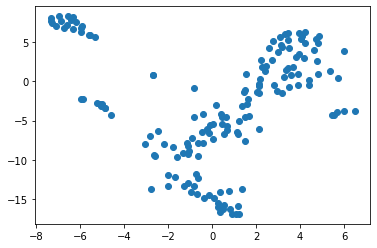

In [40]:
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.show()

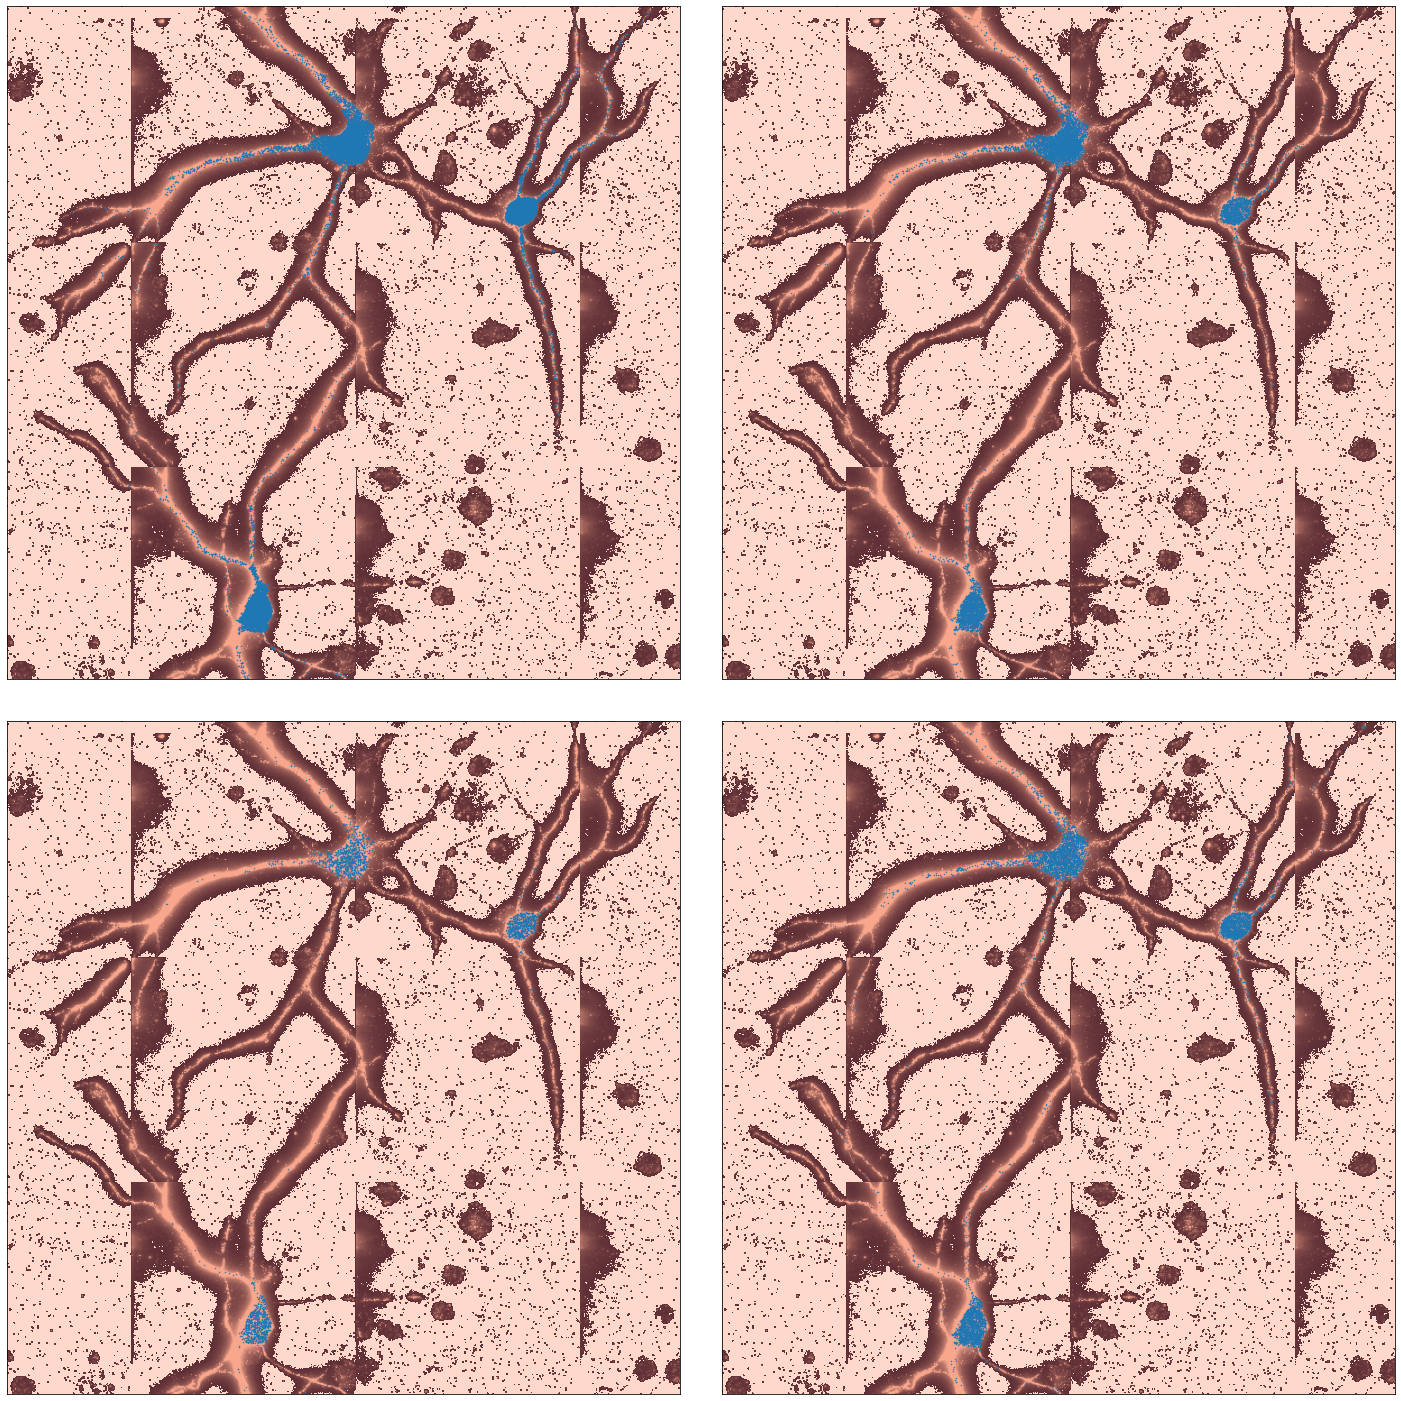

In [51]:
rec_rna = usable_rna[usable_rna['global_y'] < bbox_ymax - 1]
rec_rna = rec_rna[rec_rna['global_y'] > bbox_ymin + 1]
rec_rna = rec_rna[rec_rna['global_x'] < bbox_xmax - 1]
rec_rna = rec_rna[rec_rna['global_x'] > bbox_xmin + 1].copy()

rec_rna['global_y'] -= bbox_ymin
rec_rna['global_x'] -= bbox_xmin

# component = rec_rna[rec_rna['barcode_id'] == 1170]
max_component = pd.DataFrame({'barcode_id' : averaged.columns, 'max_component' : nmf.components_.argmax(axis=0)})
max_component.index = max_component['barcode_id']

components = np.array(max_component['max_component'].value_counts().index[:4])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.tight_layout()
image = plotting.panel(preprocessed[:,:,1], bbox, 1)

for i, component in enumerate(components):
    ax = axes.flatten()[i]
    plotting.axplot(image, ax)
    this_rna = rec_rna[np.array(max_component['max_component'][rec_rna['barcode_id']]) == component]
    ax.scatter(this_rna['global_x'], this_rna['global_y'], s=0.25)

plt.show()

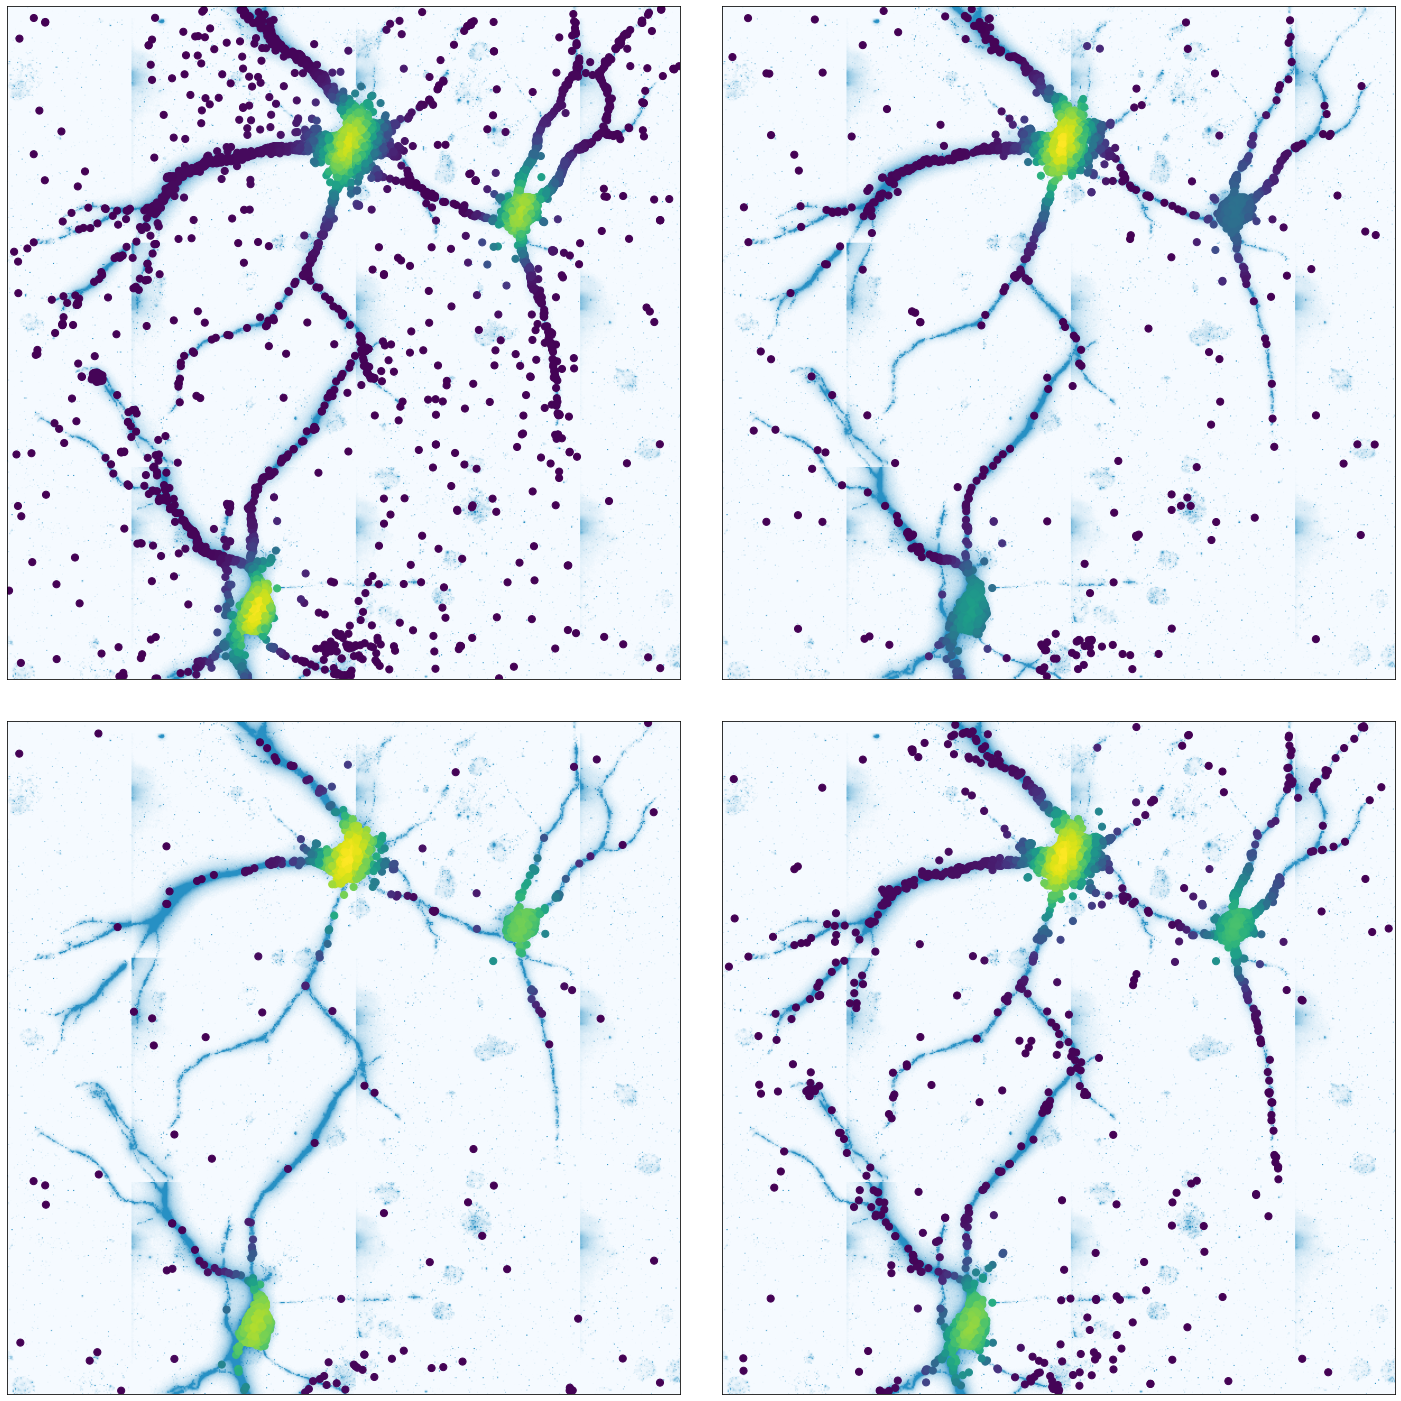

In [73]:
from scipy.stats import gaussian_kde

rec_rna = usable_unlabeled_rna[usable_unlabeled_rna['global_y'] < bbox_ymax - 1]
rec_rna = rec_rna[rec_rna['global_y'] > bbox_ymin + 1]
rec_rna = rec_rna[rec_rna['global_x'] < bbox_xmax - 1]
rec_rna = rec_rna[rec_rna['global_x'] > bbox_xmin + 1].copy()

rec_rna['global_y'] -= bbox_ymin
rec_rna['global_x'] -= bbox_xmin

components = np.array(max_component['max_component'].value_counts().index[:4])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.tight_layout()

image = plotting.panel(preprocessed[:,:,1], bbox, 1)

light_blue = {0 : two_blue[0],
              1 : two_map[3]}
blue_map = colors.seqfromdict(light_blue)


for i, component in enumerate(components):
    ax = axes.flatten()[i]
    plotting.axplot(image, ax, cmap=blue_map)
    this_rna = rec_rna[np.array(max_component['max_component'][rec_rna['barcode_id']]) == component]

    x = this_rna['global_x']
    y = this_rna['global_y']

    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(x, y, s=50, c=z)

plt.savefig(plotpath + "cellnmf.png")
plt.show()